## Project 1: Public Policy, International Relations, and Government

### Lesson Goals
- Understand how to read and write from files
- Format the urls by editing strings with Python
- Extract information from articles
- Have a basic understanding of Natural Language Processing

### Final Product
- Graph the frequency of keywords from current sources on a news topic
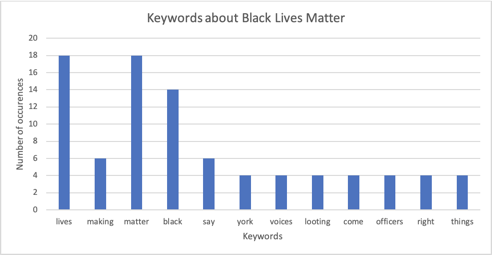

In [1]:
# Make sure Internet is turned "on" under settings
!pip install -U newspaper3k

     |████████████████████████████████| 211 kB 402 kB/s eta 0:00:01
     |████████████████████████████████| 7.4 MB 3.4 MB/s eta 0:00:01
     |████████████████████████████████| 80 kB 4.2 MB/s eta 0:00:011
     |████████████████████████████████| 48 kB 2.9 MB/s  eta 0:00:01
  Created wheel for jieba3k: filename=jieba3k-0.35.1-py3-none-any.whl size=7398406 sha256=cb139b62f927935e55c080e740b2448ba3bb3effb7f0e1a16f5202f4c47352b2
  Stored in directory: /root/.cache/pip/wheels/4c/91/46/3c208287b726df325a5979574324878b679116e4baae1af3c3
  Created wheel for feedfinder2: filename=feedfinder2-0.0.4-py3-none-any.whl size=3355 sha256=1eb54daf8dc0503dfd0735cf53e517b56bc517523fcdfa528b7d955c3adcc9c6
  Stored in directory: /root/.cache/pip/wheels/7f/d4/8f/6e2ca54744c9d7292d88ddb8d42876bcdab5e6d84a21c10346
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-py3-none-any.whl size=13538 sha256=0ce5cf0d0528221eb021585da2bf188b3d8259c2d0d3a81591f31ccce5012b41
  Stored in directory: /root/.cache/pi

These are python libraries that we want to import; documentation for each library is linked
- https://newspaper.readthedocs.io/en/latest/
- https://www.crummy.com/software/BeautifulSoup/bs4/doc/


In [2]:
# We will use Beautiful Soup to pull out website URLs
from bs4 import BeautifulSoup  

# We will use Newspaper3k to get information from the article and our input url
from newspaper import Article  

Start by googling any current events topic. For this example I googled "Black Lives Matter" and clicked on the "News" tab. Then, I copied and pasted the url between the quotes and assigned it to the variable "url."

<!doctype html><html lang="en"><head><meta charset="UTF-8"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>black lives matter - Google Search</title><script nonce="KoSQAEXDFaG42hEwNXh1oQ==">(function(){
document.documentElement.addEventListener("submit",function(b){var a;if(a=b.target){var c=a.getAttribute("data-submitfalse");a="1"==c||"q"==c&&!a.elements.q.value?!0:!1}else a=!1;a&&(b.preventDefault(),b.stopPropagation())},!0);document.documentElement.addEventListener("click",function(b){var a;a:{for(a=b.target;a&&a!=document.documentElement;a=a.parentElement)if("A"==a.tagName){a="1"==a.getAttribute("data-nohref");break a}a=!1}a&&b.preventDefault()},!0);}).call(this);(function(){
var a=window.performance;window.start=Date.now();a:{var b=window;if(a){var c=a.timing;if(c){var d=c.navigationStart,f=c.responseStart;if(f>d&&f<=window.start){window.start=f;b.wsrt=f-d;break a}}a.now&&(b.wsrt=Math.floor(a.now()))}}window.google=window.google
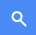
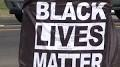

In [3]:
url = 'https://www.google.com/search?q=black+lives+matter&source=lnms&tbm=nws&sa=X&ved=2ahUKEwi7wK78tJnrAhUDvFkKHYu7AcsQ_AUoAXoECBkQAw&biw=1016&bih=559&dpr=2'

article = Article(url)  # Now we use the newspaper library to pull out the article
article.download()
html_page = article.html
print(html_page)

We want to parse through the html to find references to links that we can look through; specify parser with the features tag.

In [4]:
soup = BeautifulSoup(html_page, features="lxml")

We want to put all the urls we find in a text file that we can save and reference again in the future. The `'w'` tag specifies that we want to write to our file. This file will be created in the same folder unless it already exists there.


In [5]:
sources_file = open('sources.txt', 'w')

In HTML, the `"a"` tag refers to a link. We're looking for links, so we want to pull `"a"` tags. 

Here's an example: `<a href="https://developers.google.com/community/dsc">Google Developer Student Club Website</a>`.



In [6]:
for link in soup.findAll('a'):
    # We find all the links on the page using the beautiful soup library
    current_link = link.get('href')  
    print(current_link)
    sources_file.write(current_link + '\n')

/?sa=X&ved=0ahUKEwjz5-bb8oDsAhWI_qQKHZdEDIYQOwgC
/search?q=black+lives+matter&tbm=nws&sa=X&biw=1016&bih=559&ie=UTF-8&gbv=1&sei=rBhsX_PhDIj9kwWXibGwCA
/search?q=black+lives+matter&biw=1016&bih=559&ie=UTF-8&source=lnms&sa=X&ved=0ahUKEwjz5-bb8oDsAhWI_qQKHZdEDIYQ_AUIBSgA
/search?q=black+lives+matter&biw=1016&bih=559&ie=UTF-8&tbm=isch&source=lnms&sa=X&ved=0ahUKEwjz5-bb8oDsAhWI_qQKHZdEDIYQ_AUIBygC
/search?q=black+lives+matter&biw=1016&bih=559&ie=UTF-8&tbm=shop&source=lnms&sa=X&ved=0ahUKEwjz5-bb8oDsAhWI_qQKHZdEDIYQ_AUICCgD
https://maps.google.com/maps?q=black+lives+matter&biw=1016&bih=559&dpr=2&um=1&ie=UTF-8&sa=X&ved=0ahUKEwjz5-bb8oDsAhWI_qQKHZdEDIYQ_AUICSgE
/search?q=black+lives+matter&biw=1016&bih=559&ie=UTF-8&tbm=vid&source=lnms&sa=X&ved=0ahUKEwjz5-bb8oDsAhWI_qQKHZdEDIYQ_AUICigF
/search?q=black+lives+matter&biw=1016&bih=559&ie=UTF-8&tbm=bks&source=lnms&sa=X&ved=0ahUKEwjz5-bb8oDsAhWI_qQKHZdEDIYQ_AUICygG
/advanced_search
/search?q=black+lives+matter&biw=1016&bih=559&ie=UTF-8&tbm=nws&source=l

Remember to close our file after writing to it.

In [7]:
sources_file.close()

### STOP and think

Now we want to check the file and see what was extracted. You may notice that there is some extra information beyond just urls we can parse through. Taking a closer look, all the urls we want for articles are prefaced by the following string of characters `"/url?q="`, but we can easily remove this with a little python code. They also all end with `"&sa"` and more stuff, so we need to remove that as well. Also, the urls to the websites we want are printed twice.

## QUESTION: How can we ensure we're only pulling information from each url once?

## SOLUTION: A set

A set in python only holds unique values.

Now we want to read in the file contents that we previously wrote to. To do this, let's use the read (`"r"`) tag. Just in case the file does not already exist (like if you only copy and paste the following code in your project), we will use a "try-except" block to read from our file.

In [8]:
try:
    sources_file = open('sources.txt', 'r')
except:
    print('Please make a file called sources.txt and populate it with article urls.')

Now let's read through the file and assign the entire text to a variable called `contents`.

In [9]:
contents = sources_file.read()
sources_file.close()  # remember to close our file again

Each url is printed on it's own line so we want to create a list of all the lines by splitting on the line break character


In [10]:
all_urls_set = set(contents.split("\n"))  # The split command generates a list
substring_to_remove_from_beginning = "/url?q="
substring_to_remove_from_end = "&sa"  # And everything that comes after is also junk

cleaned_urls_list = [] # We will store our cleaned URLs here
for url in all_urls_set:
    # First let's check for the substring "/url?q=" which we can use to identify relevant urls
    if substring_to_remove_from_beginning in url:
        # We want to remove the substring at the beginning and replace it with an empty string
        cleaned_url = url.replace(substring_to_remove_from_beginning, "") 
        
        # We want to pull everything before "&qa" so we split on "&qa" and take the first part
        cleaned_url_split = cleaned_url.split(substring_to_remove_from_end)
        print(cleaned_url_split)
        cleaned_url = cleaned_url_split[0]
        print(cleaned_url)
        
        cleaned_urls_list.append(cleaned_url)

['https://www.foxnews.com/sports/former-nfl-player-marcellus-wiley-rips-black-lives-matter-after-it-removes-page-on-disrupting-nuclear-family-structure', '=U&ved=2ahUKEwjz5-bb8oDsAhWI_qQKHZdEDIYQxfQBMAl6BAgFEAE&usg=AOvVaw0mOs0dEcrqoT_tgZx_ryCE']
https://www.foxnews.com/sports/former-nfl-player-marcellus-wiley-rips-black-lives-matter-after-it-removes-page-on-disrupting-nuclear-family-structure
['https://www.foxnews.com/food-drink/costco-cheese-black-lives-matter', '=U&ved=2ahUKEwjz5-bb8oDsAhWI_qQKHZdEDIYQxfQBMAV6BAgCEAE&usg=AOvVaw1vzkxpP8IgENAsls6E2YiU']
https://www.foxnews.com/food-drink/costco-cheese-black-lives-matter
['https://www.usatoday.com/story/money/food/2020/09/22/blm-costco-wholesale-club-palmetto-cheese/3496387001/', '=U&ved=2ahUKEwjz5-bb8oDsAhWI_qQKHZdEDIYQxfQBMAh6BAgDEAE&usg=AOvVaw0NmMYNNlX8IgM8YMcT9WLf']
https://www.usatoday.com/story/money/food/2020/09/22/blm-costco-wholesale-club-palmetto-cheese/3496387001/
['https://www.nbclosangeles.com/local-2/murrieta-black-lives-m

### STOP and think

On your own, try to save our list of cleaned urls to a new file called `cleaned_sources.txt`.

In [11]:
# Solution: Join all the urls on the newline character ("\n)
all_cleaned_urls = "\n".join(cleaned_urls_list)  # This is a string
cleaned_urls_file = open('cleaned_sources.txt', 'w')
cleaned_urls_file.write(all_cleaned_urls)
cleaned_urls_file.close()

Now we can actually use the urls we collected. We can use Newspaper3k to get some fancier information from the article and do some natural language processing (NLP). Natural language processing refers to using computers and software to interact with text. We can use machine learning tools to understand langugage better.

In [12]:
all_keywords = []

for news_article_url in cleaned_urls_list:
    try:
        # Let's get some basics from the article after we cleaned it
        print(news_article_url)
        current_article = Article(news_article_url)
        current_article.download()
        current_article.parse()
        print(current_article.title)
        print(current_article.authors)
        print(current_article.text)

        # On your own: What line do I need to add to get the publish date of the article?
        
#     except:
#         print("No information extracted from the following url " + news_article_url)
        
        
        
        
        
        
        
        
        
        # Solution:
        print(current_article.publish_date)

        # Now let's get use Newspaper3k to get some fancier information from the article
        current_article.nlp()

        # This is where it gets interesting when we pull out the keywords from each article
        current_keywords = current_article.keywords
        print(current_keywords)
        all_keywords.extend(current_keywords)

        # Let's see what the discussion is about and compare
        # From here we can save keywords to a CSV file and make graphs in Excel or a simple word cloud

    except:
        print("No information extracted from the following url " + news_article_url)


https://www.foxnews.com/sports/former-nfl-player-marcellus-wiley-rips-black-lives-matter-after-it-removes-page-on-disrupting-nuclear-family-structure
Former NFL player Marcellus Wiley rips Black Lives Matter after it removes page on disrupting 'nuclear family structure'
['Daniel Canova', 'Dan Canova Is A Sports Reporter For Fox News. Follow Him On Twitter']
Marcellus Wiley, a former NFL defensive lineman and current member of Fox Sports 1’s “Speak for Yourself,” unleashed on the Black Lives Matter movement after the group removed a page from its site that reprimanded “Western-prescribed nuclear family structure.”

“Heard too many people tell me that I was wrong for misinterpreting BLM’s mission statement and I took their words out of context,” Wiley tweeted out on Monday.

“You were saying??? #factsoverfeelings #apologyaccepted,” Wiley said in the tweet with a video from June of him stating why it was a bad idea for the NBA to paint “Black Lives Matter” on their courts.

LEBRON JAMES O

Murrieta Black Lives Matter Roadside Stand Becomes Target of Vandalism
[]
A roadside stand in Murrieta where customers can shop for Black Lives Matter merchandise has become a target of vandalism, and the owners says of hate as well.

"I've been this color all my life so abuse has been from a baby to now," Esther Grant said.

Grant says she opened the stand back in June hoping to promote racial equality and social justice but also to raise money for her dream: opening a youth center called "Unity Hope."

"That can unite the youth so they can get help," she said. "We are building up funds to get a building."

But over the past few months, Grant and her grandson say they have endured a lot of abuse.

"We've been dealing with a lot people driving by here saying racial slurs," Shemar Lucas said.

Even during an interview with NBCLA, someone drove by and yelled at the stand.

"What did they say? 'Black Lives are terrorists.' There were kids in that car. Who taught them that? Who taught them

Some Protests Against Police Brutality Take a More Confrontational Approach
['Nellie Bowles']
In Rochester, N.Y., protesters have confronted people at outdoor restaurants, shaking dinner tables. Marchers in Washington also accosted people eating outside, urging everyone to raise their fists to show their allegiance to the movement.

The more personal tactics echo those being used against elected officials, with activists showing up not only outside mayor’s offices but their homes as well. The apartment building where the mayor of Portland lives has been vandalized. Protesters lit fires outside, ignited fireworks and broke into one of the businesses in the building on his birthday. In San Jose, Calif., demonstrators graffitied and egged the mayor’s house and lit an American flag in front of it, according to the police. In Rochester, people have recently posted police officers’ home addresses and information about their families, according to a police spokeswoman.

In Portland, Jessie Bu

Former NFL player Marcellus Wiley rips Black Lives Matter after it removes page on disrupting 'nuclear family structure'
['Daniel Canova', 'Dan Canova Is A Sports Reporter For Fox News. Follow Him On Twitter']
Marcellus Wiley, a former NFL defensive lineman and current member of Fox Sports 1’s “Speak for Yourself,” unleashed on the Black Lives Matter movement after the group removed a page from its site that reprimanded “Western-prescribed nuclear family structure.”

“Heard too many people tell me that I was wrong for misinterpreting BLM’s mission statement and I took their words out of context,” Wiley tweeted out on Monday.

“You were saying??? #factsoverfeelings #apologyaccepted,” Wiley said in the tweet with a video from June of him stating why it was a bad idea for the NBA to paint “Black Lives Matter” on their courts.

LEBRON JAMES OFFERING TO PAY FOR FELONS' FINES TO VOTE IN ELECTION

Wiley added: "Seems some have forgotten I navigated from the bottom of this system. I planned & 

BLM co-founder argues Black Kentucky AG gave a 'Bull Connor speech in 2020'
['Sam Dorman', 'Sam Dorman Is A Reporter With Fox News. Follow Him On Twitter']
Black Lives Matter co-founder Alicia Garza suggested on Wednesday that Kentucky Attorney General Daniel Cameron sounded like a notorious segregationist and racist from the civil rights era.

Her comments came on MSNBC's "The ReidOut" after Cameron spoke about the grand jury's decision to indict one of the police officers involved in Breonna Taylor's death on three counts of wanton endangerment.

"I think what I saw this morning was a Bull Connor speech in 2020," she said, referring to the former Alabama politician. "And you’re right," she told MSNBC host Joy Reid, "unfortunately, it was being given by a Black prosecutor."

MSNBC GUEST SAYS BLACK KENTUCKY AG IS 'SKINFOLK' BUT 'NOT KINFOLK'

Reid had urged viewers to focus on Cameron's affiliation with the Republican Party, saying the fact he was Black didn't mean anything.

"I think 

No information extracted from the following url http://komonews.com/news/politics/komo-news-poll-washington-state-voters-have-favorable-view-of-black-lives-matter-protests


Now we have a list of all the key words. Let's count how many time each word occurs.

In [13]:
from collections import Counter
dictionary_of_keyword_counts = dict(Counter(all_keywords))
print(dictionary_of_keyword_counts)

{'thats': 2, 'wiley': 2, 'right': 2, 'family': 2, 'times': 4, 'black': 12, 'likely': 2, 'player': 2, 'nuclear': 2, 'nfl': 2, 'rips': 2, 'video': 2, 'matter': 10, 'marcellus': 2, 'page': 2, 'removes': 4, 'respect': 2, 'mission': 2, 'structure': 2, 'post': 4, 'cheese': 4, 'lives': 8, 'told': 4, 'called': 2, 'palmetto': 4, 'costco': 4, 'south': 2, 'products': 2, 'georgetown': 2, 'controversy': 2, 'popular': 2, 'founder': 2, 'henry': 2, 'reportedly': 2, 'pulls': 2, 'terror': 2, 'boycott': 2, 'organization': 2, 'usa': 2, 'lucas': 2, 'racial': 2, 'roadside': 2, 'say': 2, 'tires': 2, 'murrieta': 2, 'stand': 2, 'taught': 2, 'grant': 2, 'youth': 2, 'vandalism': 2, 'opening': 2, 'target': 2, 'nails': 2, 'cops': 2, 'going': 2, 'twisted': 2, 'lebrons': 2, 'taylor': 2, 'views': 2, 'players': 2, 'nba': 2, 'speak': 2, 'shouldnt': 2, 'james': 2, 'shot': 2, 'breonna': 2, 'killed': 2, 'protests': 2, 'tactics': 2, 'portland': 2, 'brutality': 2, 'protesters': 2, 'wake': 2, 'rochester': 2, 'need': 2, 'outs

Now we can write these words to a comma-separated file and read it into Excel. 

In [14]:
import csv
keywords_csv = open('keywords.csv', 'w')
for key in dictionary_of_keyword_counts.keys():
    keywords_csv.write("%s,%s\n"%(key, dictionary_of_keyword_counts[key]))

keywords_csv.close()

Go to Excel and make a plot!

What if we only want keywords that show up a lot? Like more than 3 times? Well, we can use Python for that!

In [15]:
import csv
keywords_csv_more_words = open('keywords_more_words.csv', 'w')
for key in dictionary_of_keyword_counts.keys():
    # The code in this if-statement will only execute if we have more than 3 of the same keywords
    if dictionary_of_keyword_counts[key] > 3:
        keywords_csv_more_words.write("%s,%s\n"%(key, dictionary_of_keyword_counts[key]))
        
keywords_csv_more_words.close()

Let's look at our new and improved plot in Excel!

### As a bonus challenge, add to our previous code block to not include the keywords "black," "lives," and "matter" in our final plot.